In [1]:
# See through the cifar-10 dataset and display some image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision

import gc

import os
import sys

from CNN_model import cnn

In [2]:
# Download CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(root='data', train=True, download=False, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='data', train=False, download=False, transform=transform)

In [3]:
len(train_dataset) , len(test_dataset) # 50000 train and 10000 test data

(50000, 10000)

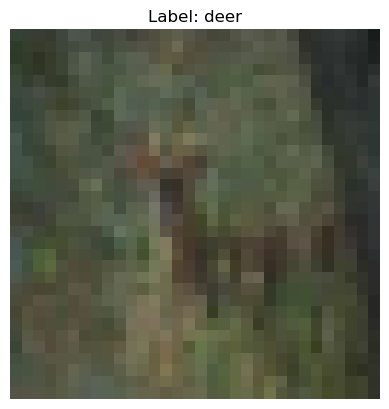

In [4]:
# Access one instance from the train_dataset
image, label = train_dataset[10]  # Replace 0 with any index to view a different instance

# Convert the image tensor to a NumPy array for visualization
image = np.transpose(image.numpy(), (1, 2, 0))  # Rearrange dimensions from (C, H, W) to (H, W, C)

# CIFAR-10 class names
classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Display the image with its label
plt.imshow(image)
plt.title(f"Label: {classes[label]}")  # Map the label to its class name
plt.axis('off')
plt.show()

In [5]:
# Convert train and test datasets to tensors
train_images_tensor = torch.stack([train_dataset[i][0] for i in range(len(train_dataset))])
train_labels_tensor = torch.tensor([train_dataset[i][1] for i in range(len(train_dataset))])

test_images_tensor = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))])
test_labels_tensor = torch.tensor([test_dataset[i][1] for i in range(len(test_dataset))])

print(f"Train images tensor shape: {train_images_tensor.shape}")
print(f"Train labels tensor shape: {train_labels_tensor.shape}")
print(f"Test images tensor shape: {test_images_tensor.shape}")
print(f"Test labels tensor shape: {test_labels_tensor.shape}")

# Convert tensors to NumPy arrays
train_images_numpy = train_images_tensor.numpy()
train_labels_numpy = train_labels_tensor.numpy()

test_images_numpy = test_images_tensor.numpy()
test_labels_numpy = test_labels_tensor.numpy()

train_images_numpy = train_images_numpy[:10]

print(f"Train images NumPy shape: {train_images_numpy.shape}")
print(f"Train labels NumPy shape: {train_labels_numpy.shape}")
print(f"Test images NumPy shape: {test_images_numpy.shape}")
print(f"Test labels NumPy shape: {test_labels_numpy.shape}")


# Clear tensors from memory
del train_images_tensor
del train_labels_tensor
del test_images_tensor
del test_labels_tensor

# Force garbage collection to free up memory
gc.collect()

Train images tensor shape: torch.Size([50000, 3, 32, 32])
Train labels tensor shape: torch.Size([50000])
Test images tensor shape: torch.Size([10000, 3, 32, 32])
Test labels tensor shape: torch.Size([10000])
Train images NumPy shape: (10, 3, 32, 32)
Train labels NumPy shape: (50000,)
Test images NumPy shape: (10000, 3, 32, 32)
Test labels NumPy shape: (10000,)


2431

In [14]:
in_channel = 3
out_channel = 32
kernel_size = 5
stride = 1
padding = 0

model = cnn(in_channel, out_channel, kernel_size, stride, padding)

In [15]:
output = model.forward(train_images_numpy)

In [16]:
output.shape

(10, 32, 28, 28)

In [17]:
output

array([[[[ 1.57937926,  1.85513581,  2.33368277, ...,  3.37913192,
           3.30985956,  3.13135534],
         [ 1.66013753,  1.93144465,  2.30310008, ...,  2.79986764,
           2.55494594,  2.38714756],
         [ 2.05175002,  2.21103475,  2.39499971, ...,  2.5647856 ,
           2.27655788,  2.09620606],
         ...,
         [ 2.41084496,  2.01981896,  2.34254562, ...,  3.81273818,
           3.8668318 ,  3.5548632 ],
         [ 2.43785538,  2.01576819,  2.1523663 , ...,  3.6374452 ,
           3.64946855,  3.09142995],
         [ 2.97152661,  2.46933909,  2.47725517, ...,  3.68781478,
           3.71889375,  3.16617732]],

        [[ 2.09959886,  2.2723876 ,  2.66173206, ...,  3.83778123,
           3.79679335,  3.71532493],
         [ 2.03644421,  2.21163114,  2.53202753, ...,  3.22807818,
           3.09505446,  2.99400843],
         [ 2.33042197,  2.50008899,  2.76091538, ...,  3.0355462 ,
           2.79172343,  2.56271684],
         ...,
         [ 2.91614482,  2.46486717

In [18]:
output.shape

(10, 32, 28, 28)

In [19]:
dl_dz = np.random.rand(10, 32, 32, 32)

In [20]:
dl_dx = model.backward(dl_dz)

ValueError: operands could not be broadcast together with shapes (32,31) (32,32) 

In [ ]:
weight_gradient.shape